# **Python and MySQL Project - Customer Shopping Behavior Analysis**

**Problem Statement**

A leading retail company wants to better understand its customers’ shopping behavior in order 
to improve sales, customer satisfaction, and long-term loyalty. The management team has 
noticed changes in purchasing patterns across demographics, product categories, and sales 
channels (online vs. offline). They are particularly interested in uncovering which factors, such 
as discounts, reviews, seasons, or payment preferences, drive consumer decisions and repeat 
purchases.

You are tasked with analyzing the company’s consumer behavior dataset to answer the 
following overarching business question: 
*How can the company leverage consumer shopping data to identify trends, improve 
customer engagement, and optimize marketing and product strategies?*

**Importing the Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Customer Shopping Data**

In [2]:
customers_data = pd.read_csv('Customer Shopping Data.csv')

**Displaying the First 10 rows of Customer Shopping Data**

In [3]:
customers_data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


**Getting the Information about the Columns**

In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

**Checking for Missing Values in Data**

In [5]:
customers_data.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

**Replacing the missing values in Review Rating column with the average rating of the Product Category**

In [6]:
customers_data.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.769976
Clothing       3.721537
Footwear       3.793771
Outerwear      3.745652
Name: Review Rating, dtype: float64

In [7]:
customers_data['Review Rating'] = customers_data.groupby('Category')['Review Rating'].transform(lambda category: category.fillna(category.mean()))

In [8]:
customers_data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

**Renaming Columns for better Readability and Documentation**

In [9]:
customers_data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [10]:
customers_data.columns = customers_data.columns.str.lower()
customers_data.columns

Index(['customer id', 'age', 'gender', 'item purchased', 'category',
       'purchase amount (usd)', 'location', 'size', 'color', 'season',
       'review rating', 'subscription status', 'shipping type',
       'discount applied', 'promo code used', 'previous purchases',
       'payment method', 'frequency of purchases'],
      dtype='object')

In [11]:
customers_data.columns = customers_data.columns.str.replace(' ','_')
customers_data.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [12]:
customers_data = customers_data.rename(columns={'purchase_amount_(usd)':'purchase_amount'})
customers_data.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [13]:
customers_data.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Creating a New Column 'age_group' for analyzing data by Age Groups**

In [14]:
def create_age_group_column(age):
    if age < 13:
        return "Kid"
    elif age >= 13 and age <= 19:
        return "Teenager"
    elif age >= 20 and age <= 39:
        return "Young"
    elif age >= 40 and age <= 59:
        return "Old"
    else:
        return "Senior Citizen"

In [15]:
customers_data['age_group'] = customers_data['age'].apply(create_age_group_column)

In [16]:
customers_data[['age','age_group']].head(10)

,age,age_group
0,55,Old
1,19,Teenager
2,50,Old
3,21,Young
4,45,Old
5,46,Old
6,63,Senior Citizen
7,27,Young
8,26,Young
9,57,Old


**Creating a new column 'purchases_frequency' from existing column 'frequency_of_purchases'**

In [17]:
frequency_paremeters = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

In [18]:
customers_data['purchases_frequency'] = customers_data['frequency_of_purchases'].map(frequency_paremeters)

In [19]:
customers_data[['frequency_of_purchases', 'purchases_frequency']].head(10)

,frequency_of_purchases,purchases_frequency
0,Fortnightly,14
1,Fortnightly,14
2,Weekly,7
3,Weekly,7
4,Annually,365
5,Weekly,7
6,Quarterly,90
7,Weekly,7
8,Annually,365
9,Quarterly,90


**Dropping the 'frequency_of_purchases' column**

In [20]:
customers_data = customers_data.drop('frequency_of_purchases', axis='columns')
customers_data.head(10)

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,age_group,purchases_frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Old,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Teenager,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Old,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Young,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Old,365
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Old,7
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Senior Citizen,90
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Young,7
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Young,365
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Old,90


**Checking whether 'discount_applied' and 'promo_code_used' columns have same values**

In [21]:
customers_data[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [22]:
print((customers_data['discount_applied'] == customers_data['promo_code_used']).all())

True


**Dropping the 'promo code used' column**

In [23]:
customers_data = customers_data.drop('promo_code_used', axis='columns')

In [24]:
customers_data.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method', 'age_group',
       'purchases_frequency'],
      dtype='object')

## Connecting Python to MySQL

In [25]:
pip install pymysql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


**Saving DataFrame Data to MySQL**

In [26]:
from sqlalchemy import create_engine

# MySQL Server connection information
username = "root"
password = "Incapp_12345"
host = "localhost"
port = "3306"
database = "customers_behavior"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "customers"   # choose any table name
customers_data.to_sql(table_name, engine, if_exists="replace", index=False)

print("Data is saved successfully to the database")

Data is saved successfully to the database


**Reading MySQL Data to DataFrame**

In [27]:
customers_data = pd.read_sql('select * from customers limit 10', engine)
customers_data

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,age_group,purchases_frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Old,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Teenager,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Old,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Young,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Old,365
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,14,Venmo,Old,7
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,49,Cash,Senior Citizen,90
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,19,Credit Card,Young,7
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,8,Venmo,Young,365
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,4,Cash,Old,90


In [28]:
total_revenue_by_gender = pd.read_sql("""SELECT 
    Gender, SUM(purchase_amount) AS 'Total Revenue' FROM
    customers
    GROUP BY Gender
    ORDER BY SUM(purchase_amount) DESC;""", engine)
total_revenue_by_gender

,Gender,Total Revenue
0,Male,157890.0
1,Female,75191.0


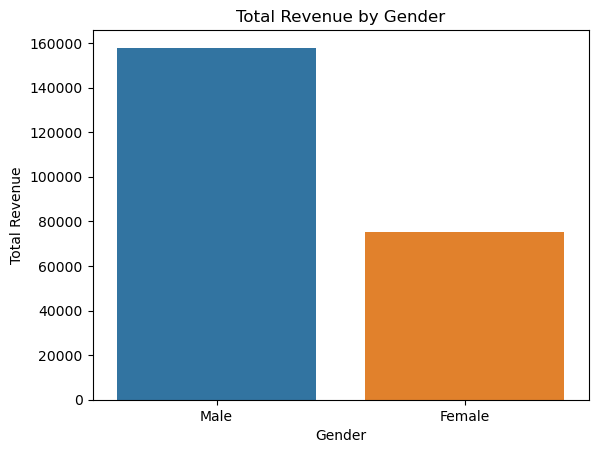

In [29]:
plt.title("Total Revenue by Gender")
sns.barplot(data=total_revenue_by_gender, x = 'Gender', y = 'Total Revenue', hue = 'Gender')
plt.show()

In [30]:
customers_spending_more_than_average_purchase_amount = pd.read_sql("""
select 
	customer_id,
    purchase_amount as 'Total Spending',
    (select round(avg(purchase_amount), 2) from customers) as 'Average Purchase Amount'
from
	customers
where discount_applied = 'Yes' and purchase_amount >= (select avg(purchase_amount) from customers);
""", engine)
customers_spending_more_than_average_purchase_amount

,customer_id,Total Spending,Average Purchase Amount
0,2,64,59.76
1,3,73,59.76
2,4,90,59.76
3,7,85,59.76
4,9,97,59.76
...,...,...,...
834,1667,64,59.76
835,1671,73,59.76
836,1673,73,59.76
837,1674,62,59.76


In [31]:
top_5_product_by_highest_review_rating = pd.read_sql("""
SELECT 
    item_purchased AS 'Product Name',
    review_rating AS 'Average Rating'
FROM
    customers
ORDER BY review_rating DESC
LIMIT 5
""", engine)
top_5_product_by_highest_review_rating

,Product Name,Average Rating
0,Sneakers,5.0
1,Boots,5.0
2,Scarf,5.0
3,Gloves,5.0
4,Dress,5.0


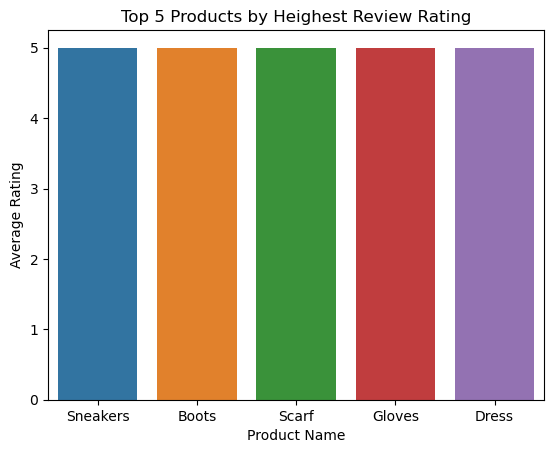

In [32]:
plt.title("Top 5 Products by Heighest Review Rating")
sns.barplot(data=top_5_product_by_highest_review_rating, x = 'Product Name', y = 'Average Rating', hue = 'Product Name')
plt.show()

In [33]:
average_purchase_amouny_by_shipping_type = pd.read_sql("""
SELECT 
    shipping_type AS 'Shipping Type',
    ROUND(AVG(purchase_amount), 2) AS 'Average Purchase Amount'
FROM
    customers
WHERE
    shipping_type IN ('Standard' , 'Express')
GROUP BY shipping_type
ORDER BY AVG(purchase_amount) DESC
""", engine)
average_purchase_amouny_by_shipping_type

,Shipping Type,Average Purchase Amount
0,Express,60.48
1,Standard,58.46


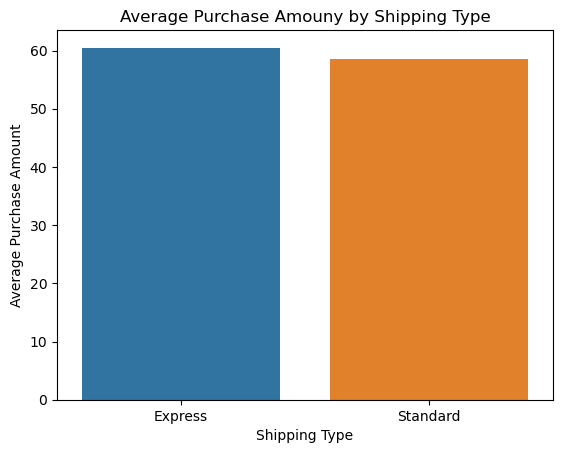

In [34]:
plt.title("Average Purchase Amouny by Shipping Type")
sns.barplot(data=average_purchase_amouny_by_shipping_type, x = 'Shipping Type', y = 'Average Purchase Amount', hue = 'Shipping Type')
plt.show()

In [35]:
average_spend_and_total_revenue_by_subscriber_type = pd.read_sql("""
SELECT 
    CASE
        WHEN subscription_status = 'Yes' THEN 'Subscribers'
        ELSE 'Non-Subscribers'
    END AS 'Subscription Status',
    ROUND(AVG(purchase_amount), 2) AS 'Average Spend',
    SUM(purchase_amount) AS 'Total Revenue'
FROM
    customers
GROUP BY subscription_status
ORDER BY SUM(purchase_amount) DESC
""", engine)
average_spend_and_total_revenue_by_subscriber_type

,Subscription Status,Average Spend,Total Revenue
0,Non-Subscribers,59.87,170436.0
1,Subscribers,59.49,62645.0


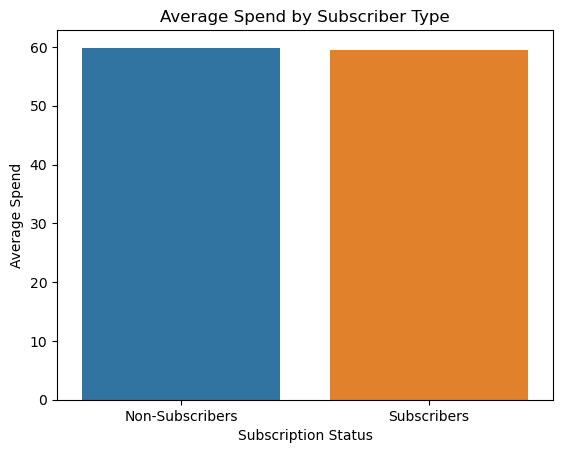

In [36]:
plt.title("Average Spend by Subscriber Type")
sns.barplot(data=average_spend_and_total_revenue_by_subscriber_type, x = 'Subscription Status', y = 'Average Spend', hue = 'Subscription Status')
plt.show()

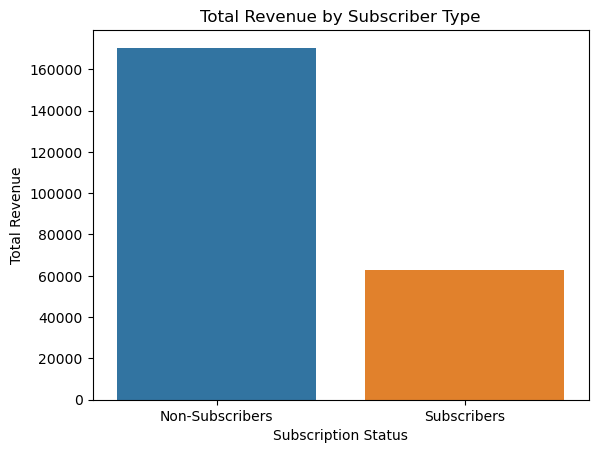

In [37]:
plt.title("Total Revenue by Subscriber Type")
sns.barplot(data=average_spend_and_total_revenue_by_subscriber_type, x = 'Subscription Status', y = 'Total Revenue', hue = 'Subscription Status')
plt.show()

In [48]:
repeat_buyers_by_subscription_status = pd.read_sql("""
SELECT 
    subscription_status, 
    COUNT(customer_id) AS repeat_buyers
FROM
    customers
WHERE
    previous_purchases > 5
GROUP BY subscription_status
""", engine)
repeat_buyers_by_subscription_status

,subscription_status,repeat_buyers
0,Yes,958
1,No,2518


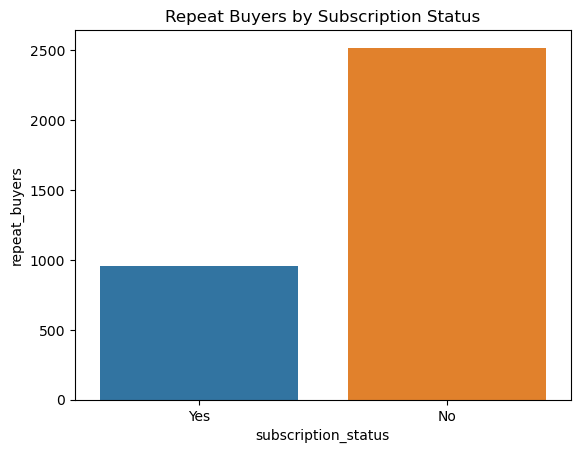

In [39]:
plt.title("Repeat Buyers by Subscription Status")
sns.barplot(data=repeat_buyers_by_subscription_status, x = 'subscription_status', y = 'repeat_buyers', hue = 'subscription_status')
plt.show()

In [49]:
revenue_contribution_by_age_group = pd.read_sql("""
SELECT 
    age_group, 
    SUM(purchase_amount) AS total_revenue
FROM
    customers
GROUP BY age_group
""", engine)
revenue_contribution_by_age_group

,age_group,total_revenue
0,Old,89741.0
1,Teenager,9080.0
2,Young,87366.0
3,Senior Citizen,46894.0


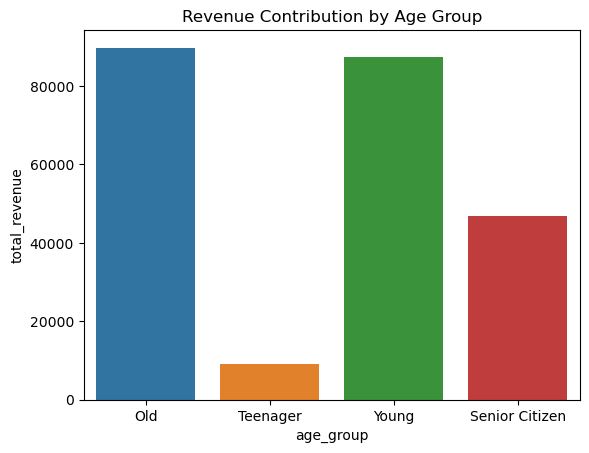

In [51]:
plt.title("Revenue Contribution by Age Group")
sns.barplot(data=revenue_contribution_by_age_group, x = 'age_group', y = 'total_revenue', hue = 'age_group')
plt.show()

In [52]:
top_5_products_by_highest_percentage_of_purchases_with_discounts_applied = pd.read_sql("""
SELECT 
    Item_Purchased as 'Item Purchased',
    ROUND(Count(CASE
					WHEN discount_applied = 'Yes' THEN Item_Purchased
				END) / COUNT('Item_Purchased') * 100, 2) AS `Percentage of Purchases`
FROM
    customers
GROUP BY item_purchased
ORDER BY `Percentage of Purchases` DESC
LIMIT 5
""", engine)
top_5_products_by_highest_percentage_of_purchases_with_discounts_applied

,Item Purchased,Percentage of Purchases
0,Hat,50.00
1,Sneakers,49.66
2,Coat,49.07
3,Sweater,48.17
4,Pants,47.37


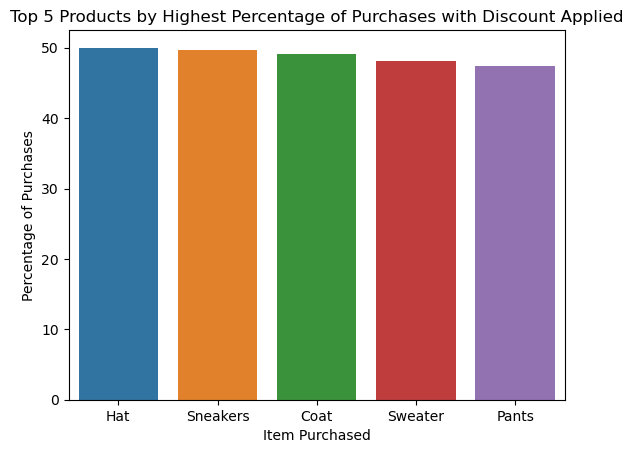

In [53]:
plt.title("Top 5 Products by Highest Percentage of Purchases with Discount Applied")
sns.barplot(data=top_5_products_by_highest_percentage_of_purchases_with_discounts_applied, x = 'Item Purchased', 
y = 'Percentage of Purchases', hue = 'Item Purchased')
plt.show()

In [54]:
number_of_customers_by_customer_type = pd.read_sql("""
SELECT 
    CASE
        WHEN previous_purchases = 1 THEN 'New'
        WHEN previous_purchases BETWEEN 2 AND 10 THEN 'Returning'
        ELSE 'Loyal'
    END AS `Customer Type`,
    COUNT(*) AS 'Number of Customers'
FROM
    customers
GROUP BY `Customer Type`
""", engine)
number_of_customers_by_customer_type

,Customer Type,Number of Customers
0,Loyal,3116
1,Returning,701
2,New,83


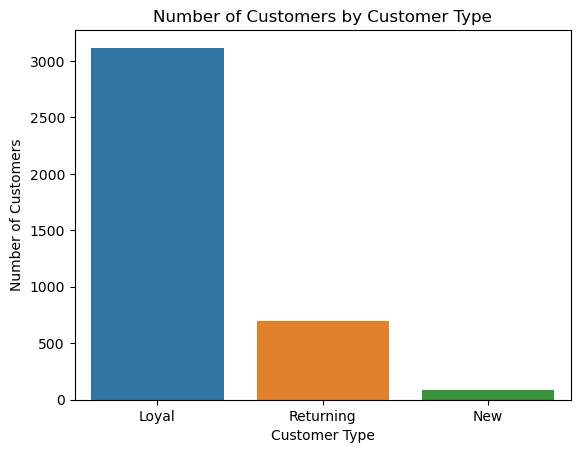

In [55]:
plt.title("Number of Customers by Customer Type")
sns.barplot(data = number_of_customers_by_customer_type, x = 'Customer Type', y = 'Number of Customers', hue = 'Customer Type')
plt.show()

In [56]:
top_3_products_in_each_category = pd.read_sql("""
SELECT 
	item_rank, category, item_purchased, total_orders
FROM 
	(
		SELECT 
			category, 
			item_purchased,
			COUNT(item_purchased) AS total_orders,
			dense_rank() OVER (PARTITION BY category ORDER BY COUNT(item_purchased) DESC) AS item_rank
		FROM 
			customers
		GROUP BY category, item_purchased
	) AS Purchased_Items_Rank
WHERE 
	item_rank <=3
""", engine)
top_3_products_in_each_category

,item_rank,category,item_purchased,total_orders
0,1,Accessories,Jewelry,171
1,2,Accessories,Sunglasses,161
2,2,Accessories,Belt,161
3,3,Accessories,Scarf,157
4,1,Clothing,Blouse,171
5,1,Clothing,Pants,171
6,2,Clothing,Shirt,169
7,3,Clothing,Dress,166
8,1,Footwear,Sandals,160
9,2,Footwear,Shoes,150


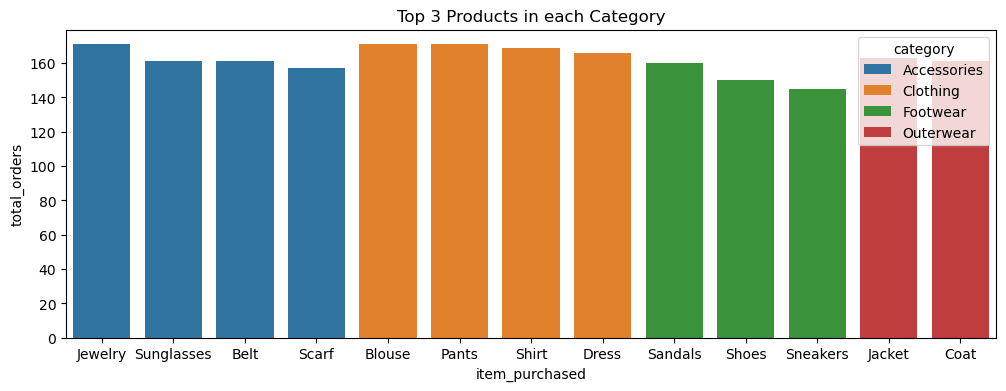

In [57]:
plt.figure(figsize=(12,4))
plt.title("Top 3 Products in each Category")
sns.barplot(data = top_3_products_in_each_category, x = 'item_purchased', y = 'total_orders', hue = 'category')
plt.show()